# **Trouver des recettes pour vider son réfrigérateur en prenant soin de sa santé**

## Projet python ENSAE - 2e année
Ce projet a été réalisé par Claire BRESSON, Emile CASSANT et Lila MEKKI dans le cadre du cours de programmation de Lino Galliana. 

# Présentation du projet
Ayant constaté que, même quand son réfrigérateur n'est pas vide, on ne sait pas toujours quoi cuisiner, nous avons décidé de mener notre projet sur cette thématique. L'objectif est donc de générer des recettes, à partir du site marmiton, en fonction des aliments disponibles et de donner les apports nutritifs associés à ces recettes. Cela permettra aux utilisateurs de varier plus facilement leur alimentation. Nous espérons ainsi promouvoir un équilibre alimentaire et réduire le nombre de problèmes (notamment de santé) liés à l'alimentation.\
Comment peut-on donc générer, à partir d'un ou plusieurs ingrédient(s), des recettes promeuvant l'équilibre alimentaire et participant ainsi à l'implémentation d'une meilleure santé globale ?\
Notre projet s'articule en quatre étapes principales :
1. Nous avons d'abord réalisé l'analyse descriptive d'une base de données qui nous a permis de mettre en évidence les habitudes de consommation et les modes de vie des ménages. Cela nous a permis de mieux comprendre les problèmes de santé auxquels fait face la société et donc de mettre en évidence l'intérêt de notre projet dans ce cadre : quelles sont les réponses que peut apporter l'alimentation aux problématiques auxquelles est confrontée la société ?
2. Nous avons ensuite nettoyé une seconde base de données, qui présente les apports nutritifs des aliments courants.
3. Après cela, nous avons scrapé le site de marmiton afin de pouvoir, pour un ou plusieurs ingrédient(s) donné(s), récupérer des recettes.
4. Enfin, nous avons, pour une recette donnée, codé un modèle permettant de calculer les apports nutritifs apportés. L'objectif de cette étape est de permettre aux utilisateurs de varier leur alimentation pour qu'elle présente le moins de carences possibles.

# **ANALYSE DESCRIPTIVE**

**Motivation du projet**

Dans une société de plus en plus sédentaire, où l'inactivité physique devient une réalité préoccupante, la nécessité de promouvoir des habitudes alimentaires saines est plus cruciale que jamais. En France, un nombre croissant de personnes adoptent des modes de vie sédentaires, ce qui entraîne une augmentation alarmante de maladies liées à une mauvaise hygiène de vie. Face à cette préoccupation grandissante, la création et l'adoption de recettes alimentaires saines deviennent un acte significatif pour préserver notre bien-être global.

L'inactivité physique associée à des choix alimentaires inappropriés contribue directement à l'augmentation des maladies chroniques telles que l'obésité, le diabète de type 2 et les maladies cardiovasculaires. La prise de conscience de l'importance d'une alimentation équilibrée et nutritive est donc essentielle pour inverser cette tendance inquiétante.

Créer des recettes alimentaires saines ne se limite pas à suivre des tendances éphémères, mais constitue plutôt un moyen concret de cultiver une relation positive avec la nourriture. Des plats riches en nutriments, équilibrés en macronutriments et composés d'ingrédients frais peuvent non seulement soutenir la santé physique, mais aussi favoriser une meilleure gestion du poids et renforcer le système immunitaire.

En encourageant la création et le partage de recettes alimentaires saines, nous pouvons inspirer un changement collectif vers des modes de vie plus équilibrés. Les effets positifs ne se limitent pas seulement à l'individu, mais se répercutent sur la société dans son ensemble, contribuant à alléger le fardeau des systèmes de santé et à créer une communauté engagée en faveur du bien-être.
    
Nous avons utilisé le site suivant pour effectuer notre analyse descriptive : https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/

In [1]:
# Importations 
import pandas as pd 
import matplotlib.pyplot as plt
from functions import transport_pie, pie_oui_non, pie_oui_non_eps

## Activité / Sédentarité 

Cette table contient les données des questionnaires auto-administrés (pour les adultes 18-79 ans) et face-à-face (pour les enfants 3-17 ans) relatifs au volet
« Sédentarité, activité physique et loisirs ». Il n’y a pas de données relatives à cette thématique pour les enfants de 0-35 mois.
Elle regroupe les informations suivantes : mode de transport du trajet domicile-travail, temps passé devant les écrans (télévision, jeux vidéo, ordinateur) pendant la
semaine et le week-end, pratique et fréquence d’une activité physique (y compris dans le cadre scolaire), type d’activité physique pratiquée, niveau d’activité physique,
niveau de sédentarité et profils d’activité physique. 

In [2]:
activ_sedentaire = pd.read_csv("https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20200117-101839/actphys-sedent.csv",sep=";") 
print(activ_sedentaire.shape)
data_pop1 = activ_sedentaire[activ_sedentaire['POPULATION'] == "Pop1 Individu"]
data_pop2 = activ_sedentaire[activ_sedentaire['POPULATION'] == "Pop2 Individu"]
activ_sedentaire.head()

(4725, 93)


,POPULATION,NOIND,transport_personnel,transport_ecole,tv_score,tv_duree,jvideo_score,jvideo_duree,ordi_score,ordi_duree,...,activite_domloissport_duree,activite_domloissport_score,activite_moderee_score,activite_intense_score,activite_total_duree,activite_total_score,nap,profil_activite,sedentarite,sedentarite_duree
0,Pop1 Individu,120100401,NaN,1.0,NaN,1.642857,NaN,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
1,Pop1 Individu,120100501,NaN,1.0,NaN,0.821429,NaN,0.964286,NaN,0.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN
2,Pop1 Individu,120100601,NaN,3.0,NaN,1.142857,NaN,0.000000,NaN,0.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
3,Pop1 Individu,120100801,NaN,1.0,NaN,1.000000,NaN,0.357143,NaN,0.357143,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
4,Pop1 Individu,120100901,NaN,2.0,NaN,2.571429,NaN,1.000000,NaN,0.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN


In [3]:
# Pop1 Individu pour les enfants de 3-17 ans et Pop2 Individu pour les adultes de 18-79 ans.
activ_sedentaire['POPULATION'].value_counts()

Pop1 Individu    2437
Pop2 Individu    2288
Name: POPULATION, dtype: int64

In [4]:
activ_sedentaire.columns.to_list()

['POPULATION',
 'NOIND',
 'transport_personnel',
 'transport_ecole',
 'tv_score',
 'tv_duree',
 'jvideo_score',
 'jvideo_duree',
 'ordi_score',
 'ordi_duree',
 'jeux_pleinair_nbjours',
 'enfant_actif',
 'eps_ouinon',
 'eps_nbjours',
 'eps_duree',
 'club_nbjours',
 'club_nb',
 'activite_musculation_nbjours',
 'activite_moderee_nbjours',
 'activite_intense_nbjours',
 'escalier_score',
 'emploi_4sem',
 'travail_freq_semaine',
 'travail_duree',
 'travail_score',
 'transport_voiture_score',
 'transport_public_score',
 'transport_velo_score',
 'transport_pied_score',
 'transport_score',
 'activite_balayer_score',
 'activite_nettoyer_score',
 'activite_aspirateur_score',
 'activite_repasser_score',
 'activite_vaisselle_score',
 'activite_lessive_score',
 'activite_jardiner_score',
 'activite_tondre_score',
 'activite_arroser_score',
 'activite_becher_score',
 'activite_bricoler_score',
 'activite_marche_score',
 'activite_piscine_score',
 'activite_velo_score',
 'activite_roller_score',
 'act

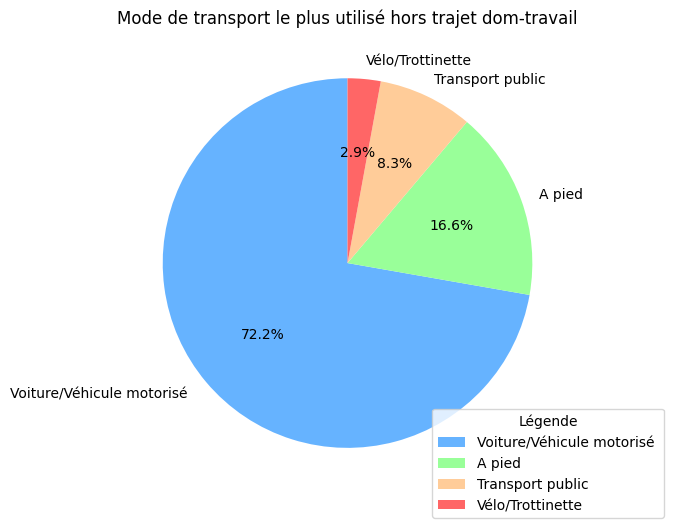

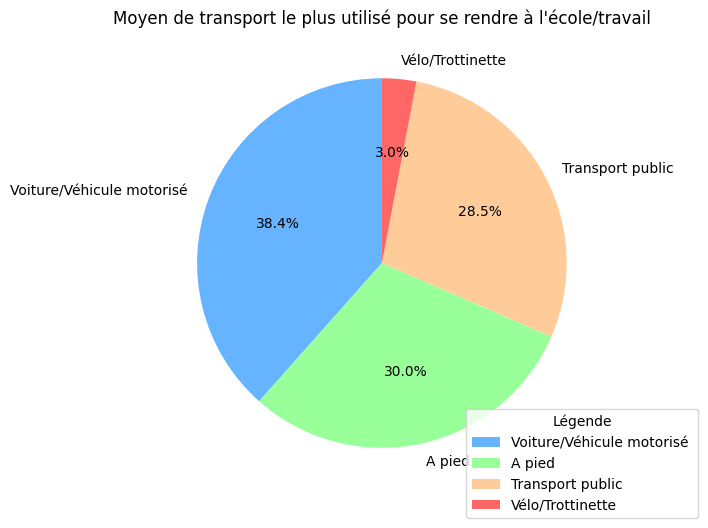

In [5]:
for i, transport in enumerate(['transport_personnel', 'transport_ecole']):
    if i==0:
        leg = 'Mode de transport le plus utilisé hors trajet dom-travail'
        transport_pie(activ_sedentaire, transport, leg)
    else:  
        leg = "Moyen de transport le plus utilisé pour se rendre à l'école/travail"
        transport_pie(activ_sedentaire, transport, leg) 

/Users/augustincablant/Documents/GitHub/project_lila/functions.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe[column].map(mapping_labels)


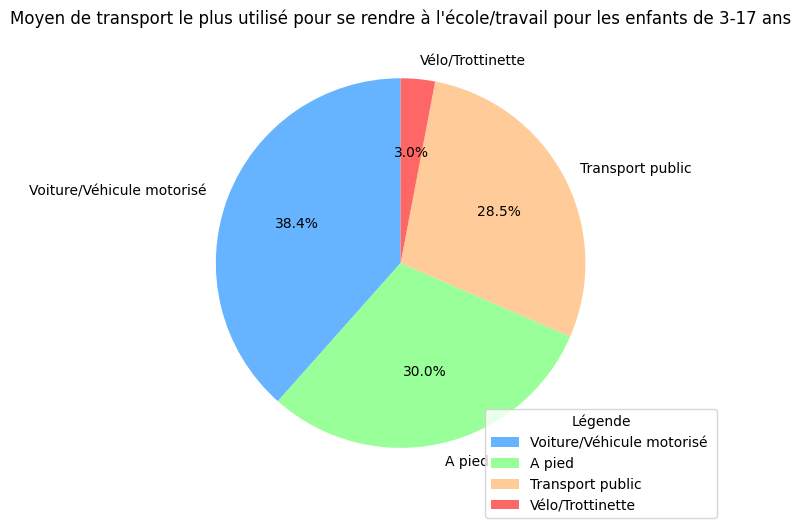

In [6]:
leg = "Moyen de transport le plus utilisé pour se rendre à l'école/travail pour les enfants de 3-17 ans"
transport_pie(data_pop1, transport, leg) 

/Users/augustincablant/Documents/GitHub/project_lila/functions.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe[column].map(mapping_labels)


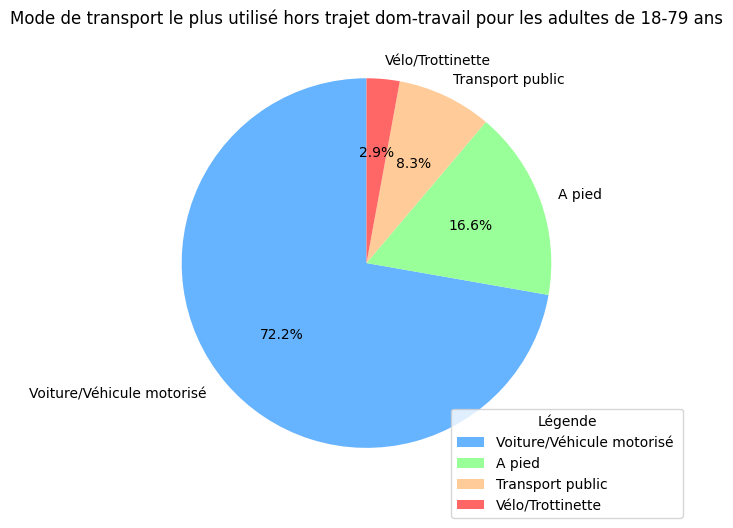

In [7]:
leg = "Mode de transport le plus utilisé hors trajet dom-travail pour les adultes de 18-79 ans"
transport_pie(data_pop2, "transport_personnel", leg) 

In [8]:
for col in ["tv_duree", "jvideo_duree", "ordi_duree"]:
    print("Durée moyenne passée devant la/les/l'", col.split('_')[0] ,activ_sedentaire[col].mean(), "(en heures)")

Durée moyenne passée devant la/les/l' tv 2.394437140370197 (en heures)
Durée moyenne passée devant la/les/l' jvideo 0.35809389641800354 (en heures)
Durée moyenne passée devant la/les/l' ordi 1.2549624108854214 (en heures)


In [9]:
for col in ["tv_duree", "jvideo_duree", "ordi_duree"]:
    print("Durée moyenne passée devant la/les/l'", col.split('_')[0] ,data_pop1[col].mean(), "(en heures) pour les enfants")

Durée moyenne passée devant la/les/l' tv 1.7185645029519727 (en heures) pour les enfants
Durée moyenne passée devant la/les/l' jvideo 0.5555430782217188 (en heures) pour les enfants
Durée moyenne passée devant la/les/l' ordi 0.9440964107259637 (en heures) pour les enfants


In [10]:
for col in ["tv_duree", "jvideo_duree", "ordi_duree"]:
    print("Durée moyenne passée devant la/les/l'", col.split('_')[0] ,data_pop2[col].mean(), "(en heures) pour les adultes")

Durée moyenne passée devant la/les/l' tv 3.1467127715835246 (en heures) pour les adultes
Durée moyenne passée devant la/les/l' jvideo 0.1378098390683801 (en heures) pour les adultes
Durée moyenne passée devant la/les/l' ordi 1.6015715929230343 (en heures) pour les adultes


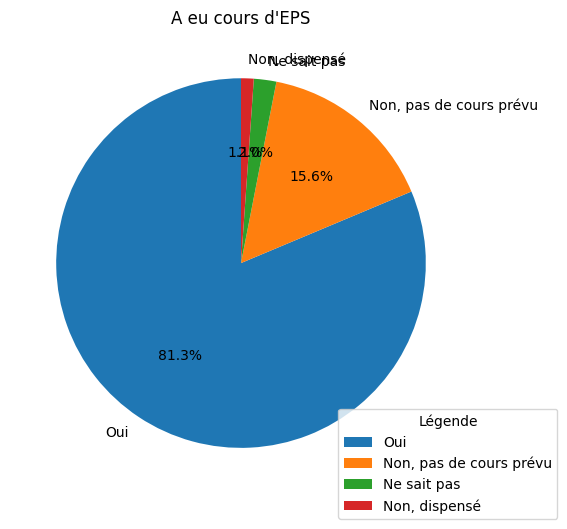

In [11]:
pie_oui_non_eps(activ_sedentaire, 'eps_ouinon', "A eu cours d'EPS")

In [12]:
for col in ["eps_nbjours", "club_nbjours", "activite_musculation_nbjours", 'activite_moderee_nbjours', 'activite_intense_nbjours']:
    print("Nombre de jours à pratiquer ", col.split('nb')[0] , ":", activ_sedentaire[col].mean())

Nombre de jours à pratiquer  eps_ : 1.4056818181818183
Nombre de jours à pratiquer  club_ : 1.0340314136125655
Nombre de jours à pratiquer  activite_musculation_ : 1.0360360360360361
Nombre de jours à pratiquer  activite_moderee_ : 2.3338497288923317
Nombre de jours à pratiquer  activite_intense_ : 1.809450038729667


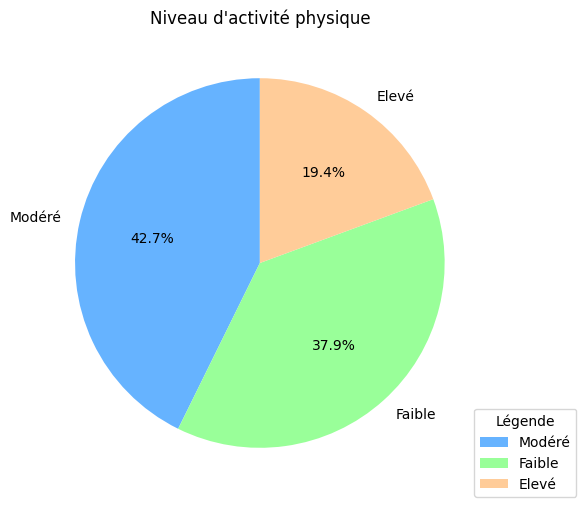

In [13]:
mapping_labels = {1: 'Faible', 2: 'Modéré', 3: 'Elevé'}
activ_sedentaire["nap"] = activ_sedentaire["nap"].map(mapping_labels)
count_by_format = activ_sedentaire["nap"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Niveau d'activité physique")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
plt.show()

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2896/3621817647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop1["nap"] = data_pop1["nap"].map(mapping_labels)


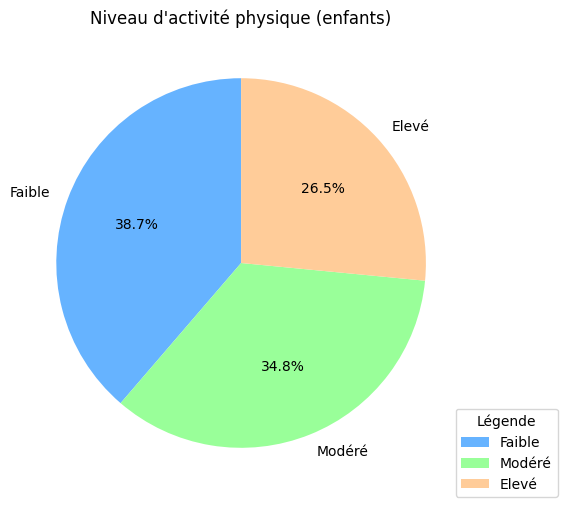

In [14]:
mapping_labels = {1: 'Faible', 2: 'Modéré', 3: 'Elevé'}
data_pop1["nap"] = data_pop1["nap"].map(mapping_labels)
count_by_format = data_pop1["nap"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Niveau d'activité physique (enfants)")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
plt.show()

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2896/2895516565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pop2["nap"] = data_pop2["nap"].map(mapping_labels)


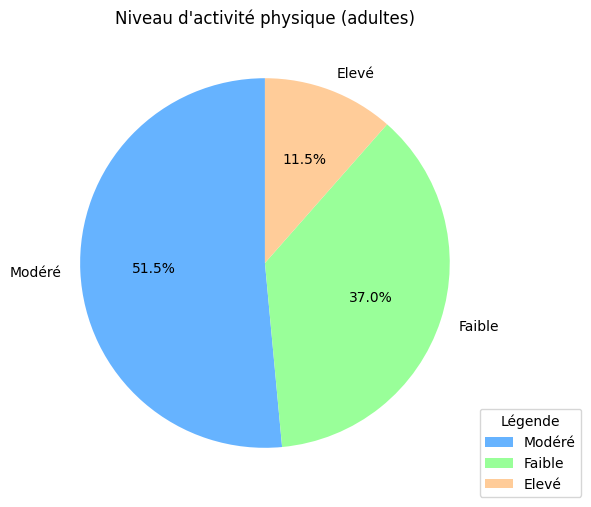

In [15]:
mapping_labels = {1: 'Faible', 2: 'Modéré', 3: 'Elevé'}
data_pop2["nap"] = data_pop2["nap"].map(mapping_labels)
count_by_format = data_pop2["nap"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Niveau d'activité physique (adultes)")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
plt.show()

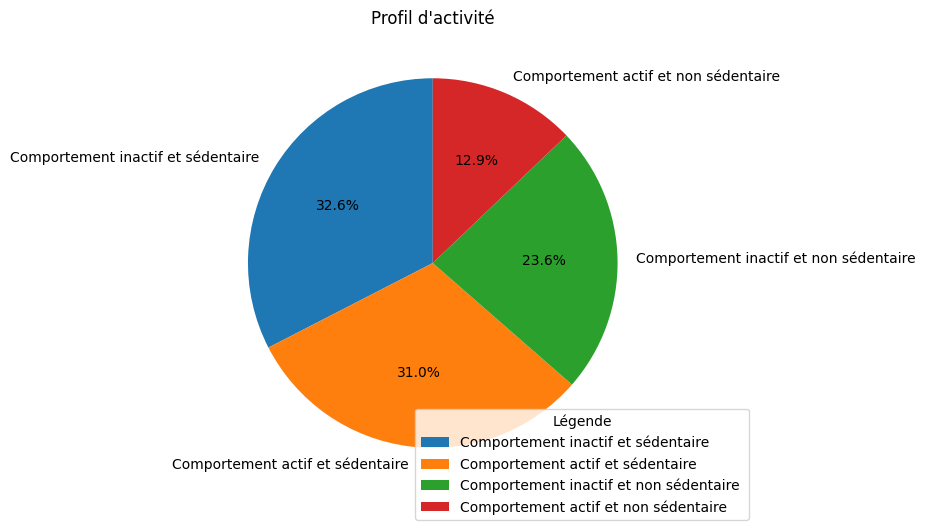

In [16]:
col = "profil_activite"
mapping_labels = {1: 'Comportement inactif et sédentaire', 2: 'Comportement inactif et non sédentaire ', 3: 'Comportement actif et sédentaire',
                  4: 'Comportement actif et non sédentaire'}
activ_sedentaire[col] = activ_sedentaire[col].map(mapping_labels)
count_by_format = activ_sedentaire[col].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90)
plt.title("Profil d'activité")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
plt.show()

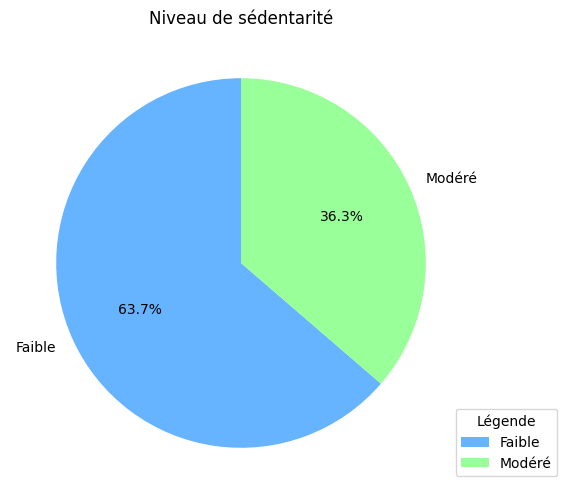

In [17]:
col = "sedentarite"
mapping_labels = {1: 'Faible', 2: 'Modéré', 3: 'Elevé'}
activ_sedentaire[col] = activ_sedentaire[col].map(mapping_labels)
count_by_format = activ_sedentaire[col].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Niveau de sédentarité")
plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
plt.show()

## Tables relatives aux habitudes des individus ou des ménages

Table HABITUDES_INDIV

Elle regroupe les informations suivantes : lieux et occasions de consommation, consommations hors-foyer et entre les repas, préférences alimentaires, présence de
sel/beurre/sauce sur la table au moment des repas, lecture des étiquettes, sources d’informations en alimentation, consommation de denrées animales crues et des
croûtes de fromage, préparation des fruits et légumes crus, spécificités de l’alimentation des enfants de 0 à 35 mois (ex : allaitement (exclusif ou partiel), type de laits
consommés, diversification alimentaire, matériaux des biberons et des tétines, préparation, stockage et conservation des biberons de lait, mode de chauffage des
laits et contenants utilisés), autoconsommation et utilisation de produits phytosanitaires au potager, consommation d’aliments issus de l’agriculture biologique et
cuisson des aliments au barbecue. 

In [56]:
habitudes_ali = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/099351b9-e32e-4e38-8f23-dec21fd07c71', sep = ';')
print(habitudes_ali.shape)
habitudes_ali.sample(10)

(4372, 389)


/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2896/1982520652.py:1: DtypeWarning: Columns (8,14,16,36,45,60,61,62,63,195) have mixed types. Specify dtype option on import or set low_memory=False.
  habitudes_ali = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/099351b9-e32e-4e38-8f23-dec21fd07c71', sep = ';')


,POPULATION,NOIND,periode_reference,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfantmidi_autre_libelle,repasenfant_freq,...,conso_legumes_secs_bio_tjr_svt,conso_cereales_bio_tjr_svt,conso_pain_bio_tjr_svt,conso_autres_alim_bio_tjr_svt,conso_barbecue,conso_barbecue_elec,conso_barbecue_bois,conso_barbecue_gaz,conso_barbecue_printps_ete_freq,conso_barbecue_automn_hiver_freq
1608,Pop2 Individu,227406001,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0
3317,Pop2 Individu,427507801,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
378,Pop2 Individu,118400601,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0
2369,Pop2 Individu,325908601,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0
3073,Pop2 Individu,422504001,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
633,Pop2 Individu,124903601,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,3.0,1.0
2592,Pop2 Individu,411400601,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,1.0,0.0,1.0,0.0,4.0,1.0
3199,Pop2 Individu,425900201,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
1321,Pop2 Individu,221100401,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0
2365,Pop2 Individu,325906501,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0


Habitudes relatives aux cantines :

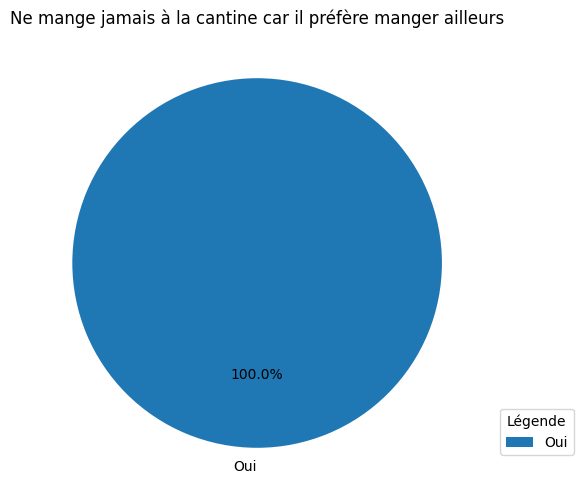

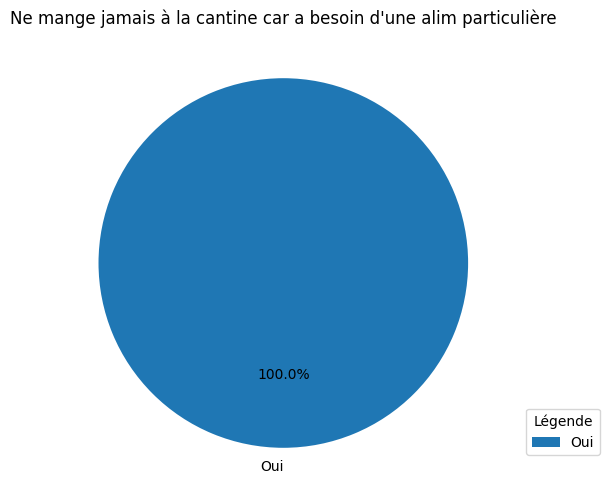

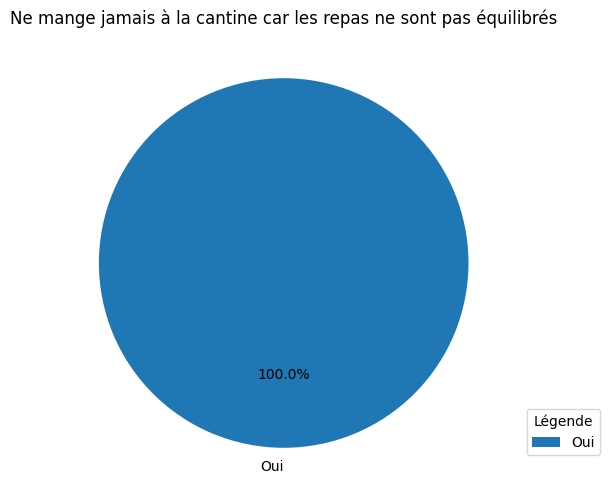

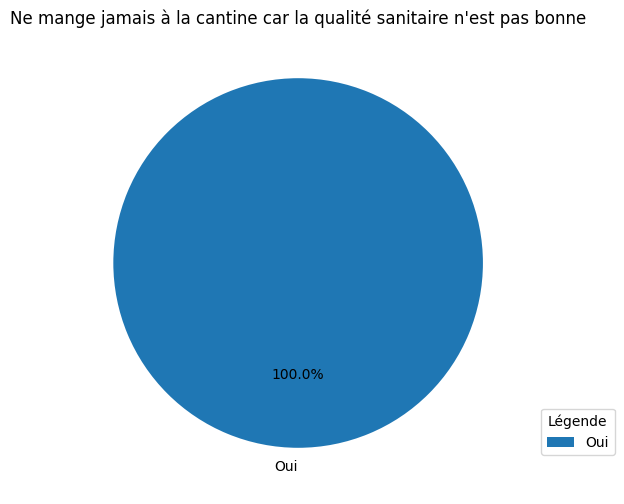

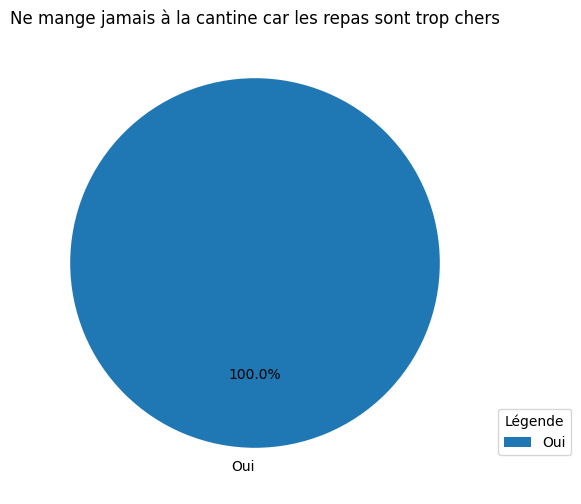

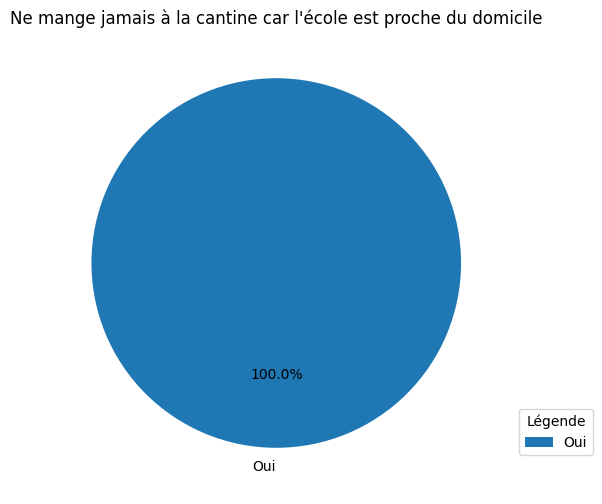

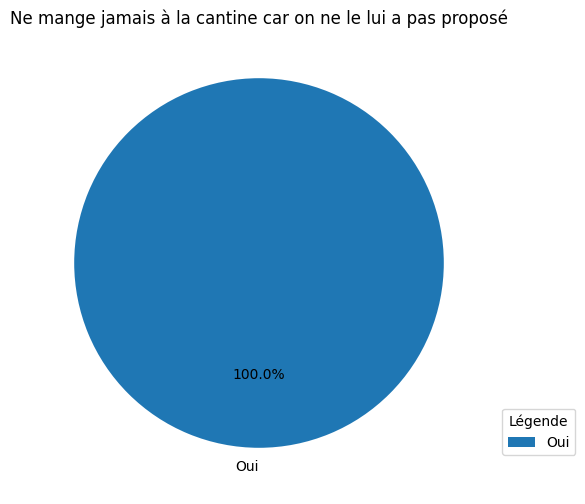

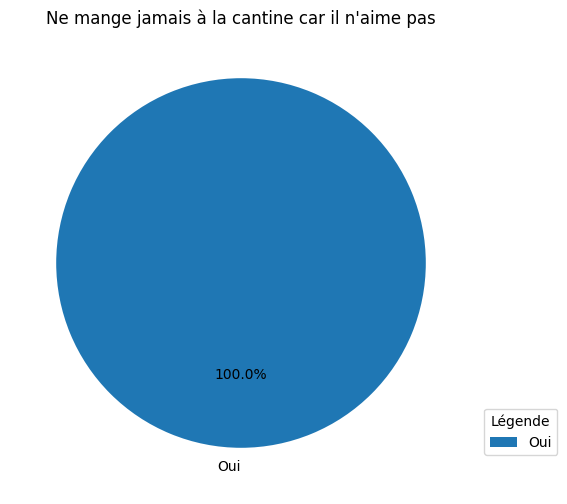

In [57]:
# Peu pertinent car population adulte
leg = ["Ne mange jamais à la cantine car il préfère manger ailleurs", 
       "Ne mange jamais à la cantine car a besoin d'une alim particulière", 
       "Ne mange jamais à la cantine car les repas ne sont pas équilibrés", 
       "Ne mange jamais à la cantine car la qualité sanitaire n'est pas bonne",
       "Ne mange jamais à la cantine car les repas sont trop chers",
       "Ne mange jamais à la cantine car l'école est proche du domicile",
       "Ne mange jamais à la cantine car on ne le lui a pas proposé",
       "Ne mange jamais à la cantine car il n'aime pas"]
for i, col in enumerate(['cantine_jms_veutpas', 'cantine_jms_probsante', 'cantine_jms_repaspasequilibre', 'cantine_jms_repaspasqualite', 
                         'cantine_jms_repaschers', 'cantine_jms_ecoleproche', "cantine_jms_paspropose", "cantine_jms_pasaime"]):
    pie_oui_non(habitudes_ali, col, leg[i])

Préférences alimentaires :

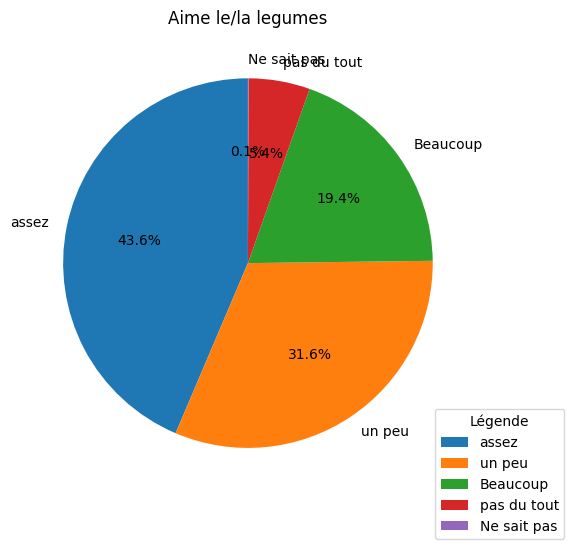

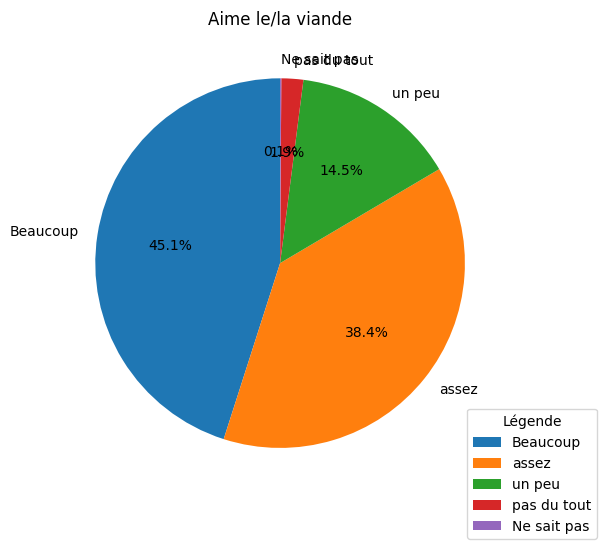

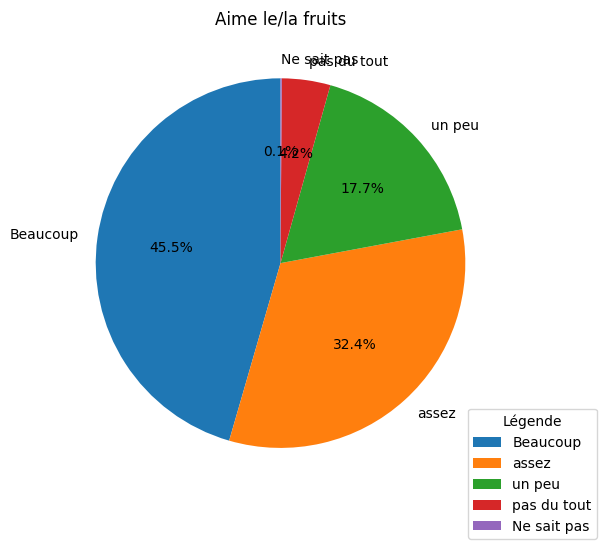

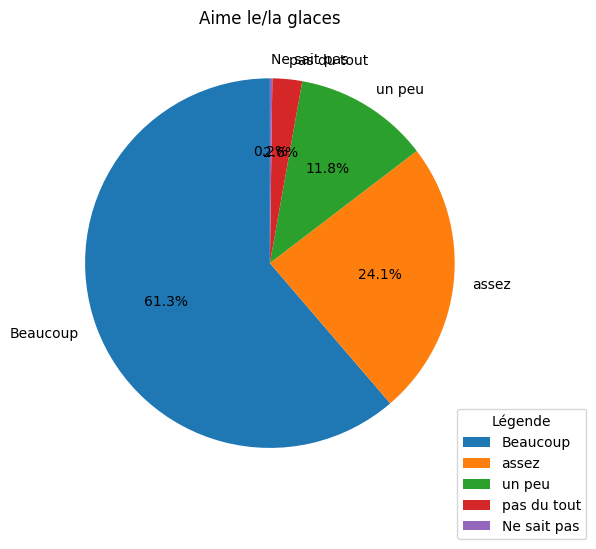

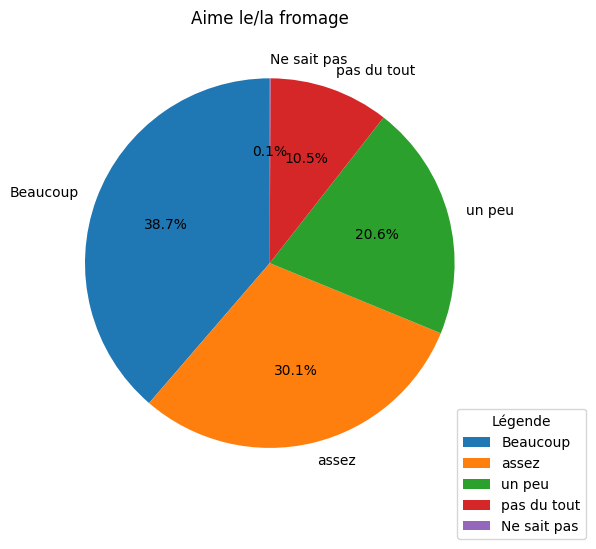

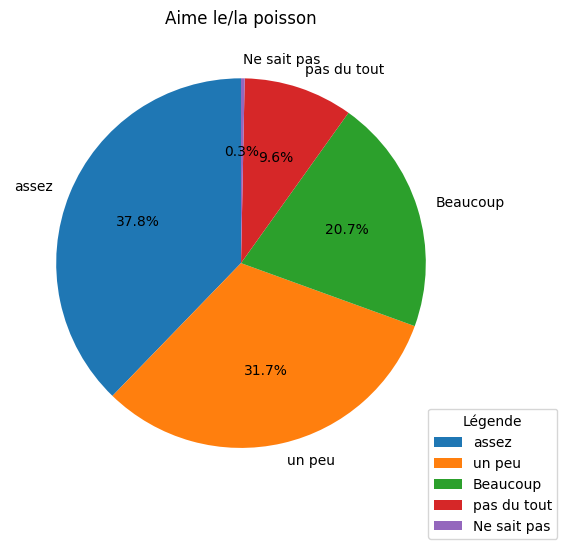

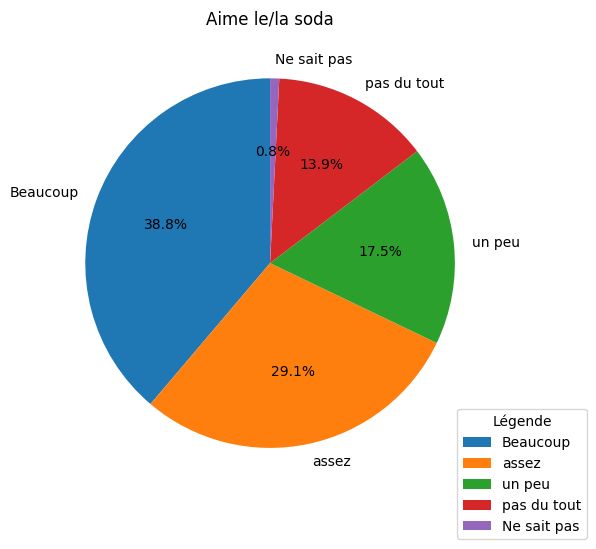

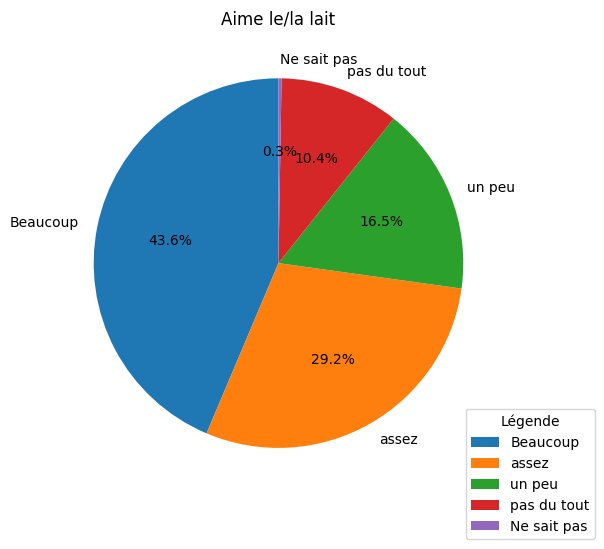

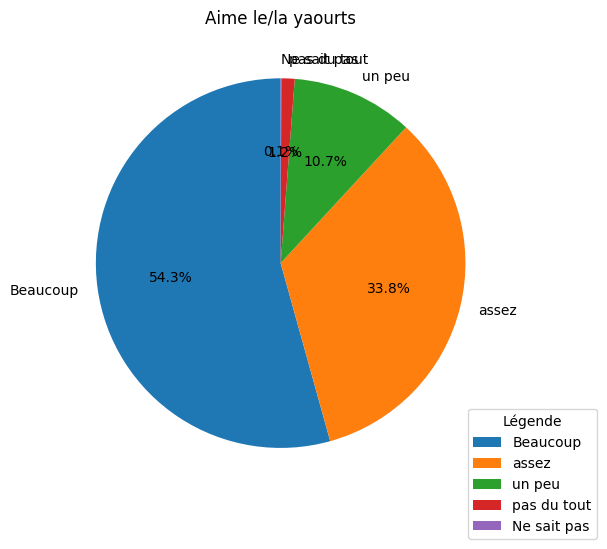

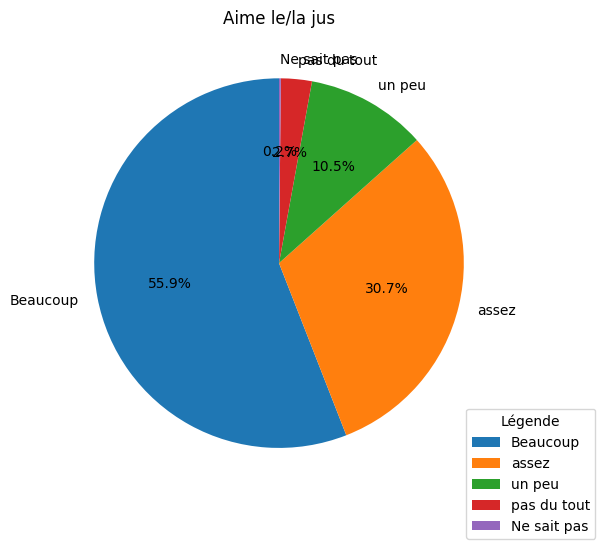

In [58]:
for col in habitudes_ali.columns.to_list():
    mapping_pref = {1: 'Beaucoup', 2: 'assez', 3: 'un peu',
                    4: 'pas du tout', 5: "Ne sait pas"}
    if col.split('_')[0]=='aime':
        habitudes_ali[col] = habitudes_ali[col].map(mapping_pref)
        count_by_format = habitudes_ali[col].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90)
        plt.title(f"Aime le/la {col.split('_')[1]}")
        plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
        plt.show()

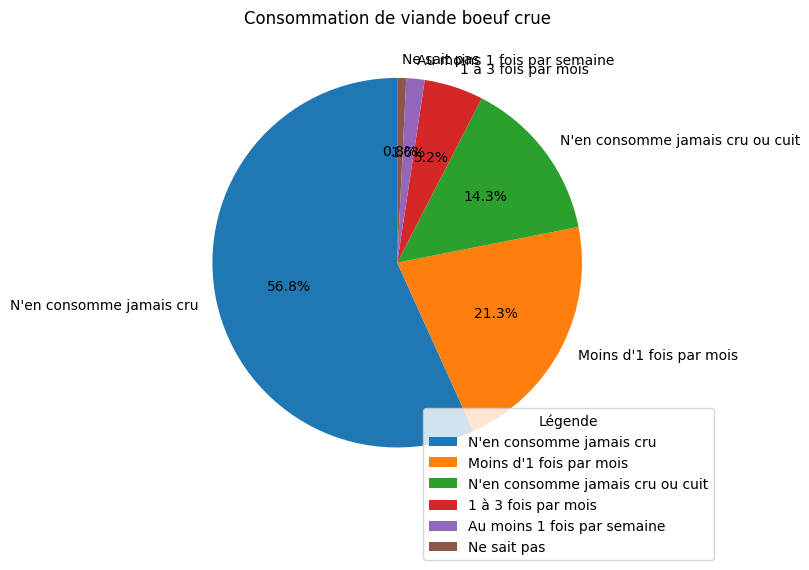

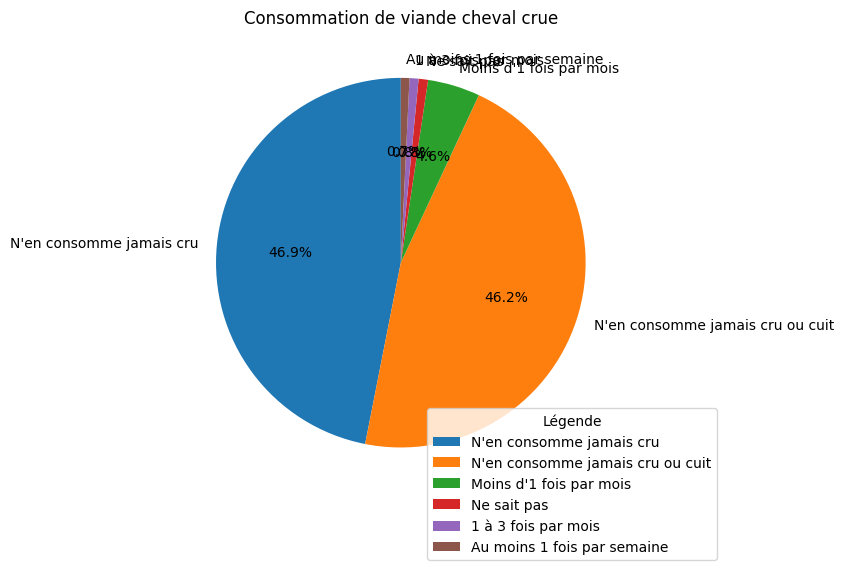

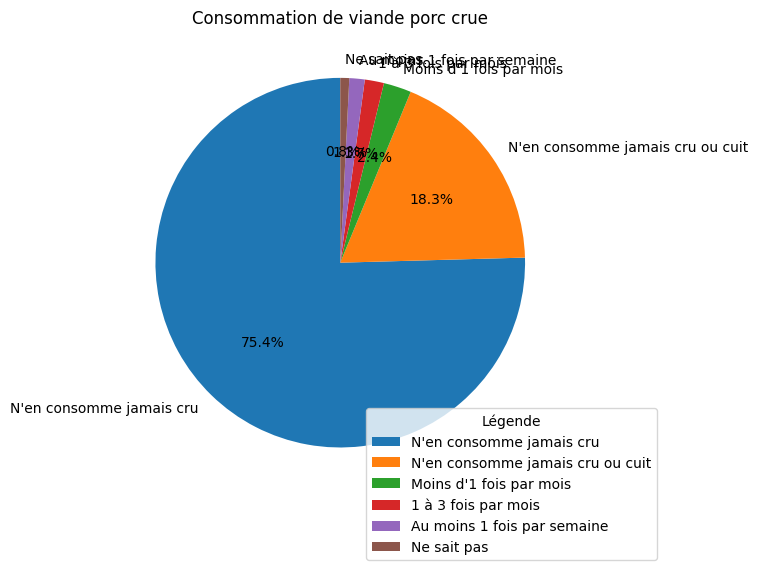

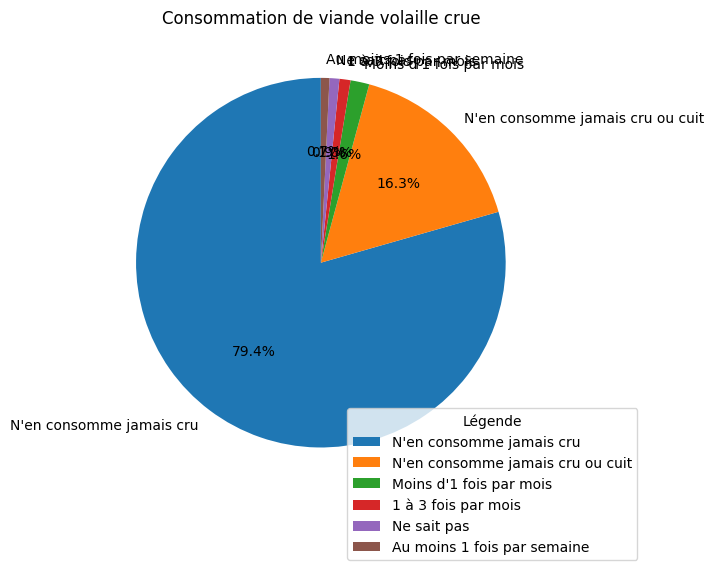

In [59]:
for col in habitudes_ali.columns.to_list():
    mapping_freq = {1: 'Au moins 1 fois par semaine', 2: '1 à 3 fois par mois', 3: "Moins d'1 fois par mois",
                    4: "N'en consomme jamais cru", 5: "N'en consomme jamais cru ou cuit", 6: "Ne sait pas "}
    if col.split('_')[-1]=='crue':
        habitudes_ali[col] = habitudes_ali[col].map(mapping_freq)
        count_by_format = habitudes_ali[col].value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(count_by_format, labels=count_by_format.index, autopct='%1.1f%%', startangle=90)
        plt.title("Consommation de " + ' '.join(col.split('_')[1:]))
        plt.legend(title = "Légende", loc='upper right', bbox_to_anchor=(1.2, 0.2)) 
        plt.show()

## Apports nutritionnels individuels journaliers estimés

Cette table présente les apports nutritionnels individuels journaliers estimés à partir des consommées observées sur 2 ou 3 jours de rappels de 24 heures pour les 4 114
individus de la Pop3, ainsi que la contribution à l’Apport Energétique Sans Alcool (AESA) pour les macronutriments et les apports pour 100 kcal pour les vitamines et
minéraux. 

In [74]:
apports = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e7f48716-368f-48e1-a7c3-ea0638b0d6a7', sep = ';')
apports.head()

,POPULATION,NOIND,nutriment1,nutriment2,nutriment3,nutriment4,nutriment5,nutriment6,nutriment7,nutriment8,...,contrib45,contrib46,contrib47,contrib48,contrib49,contrib50,contrib51,contrib52,contrib53,contrib54
0,Pop3,110100101,2077.7625,2077.2795,83.054970,287.46045,145.453580,118.051110,0.272250,16.439404,...,0.074628,0.946185,0.345410,0.110520,16.502401,0.215986,8.642483,0.106113,0.258121,1.267153
1,Pop3,110100701,1123.7395,1122.6108,42.008881,141.19160,87.729454,40.941555,1.554727,21.721514,...,0.145274,1.462126,0.317232,0.098729,30.148006,0.119924,24.783506,0.252590,0.718946,0.070505
2,Pop3,110100801,2544.5754,2543.0146,87.255280,292.85364,148.375690,123.386040,0.837265,20.448515,...,0.050513,0.944199,0.214649,0.066984,11.707060,0.131240,6.312596,0.114005,0.332603,1.175436
3,Pop3,110101201,2154.6367,1738.7144,64.621910,176.34831,108.290740,52.579441,0.252013,14.028072,...,0.230425,1.569673,0.578777,0.112707,14.442437,0.533786,10.153035,0.224728,1.051633,0.520615
4,Pop3,110101401,1229.2993,1230.0304,44.161503,134.01630,52.806332,67.524727,0.441230,12.723254,...,0.124503,0.932228,0.360054,0.078900,15.277953,0.157646,2.613579,0.183976,0.467196,1.011166


In [75]:
# Nous allons nous concentrer sur les macronutriments et les apports énergétiques
map_macro = {'nutriment3':'protéines', 'nutriment4':'glucides', "nutriment10":"lipides"} 
map_cal = {'nutriment1':'Apport énergétique total', 'nutriment2':'Apport énergétique total sans alcool'} 
apports.rename(map_macro, axis= 1, inplace = True)
apports.rename(map_cal, axis= 1, inplace = True)

In [78]:
stat_des = pd.DataFrame(apports[['protéines', 'glucides', 'lipides', 'Apport énergétique total', 'Apport énergétique total sans alcool']].describe())
stat_des

,protéines,glucides,lipides,Apport énergétique total,Apport énergétique total sans alcool
count,4114.000000,4114.000000,4114.000000,4114.000000,4114.000000
mean,73.847446,225.380057,70.162491,1911.877742,1873.579863
std,27.099156,85.658972,28.208624,672.881615,645.313336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.147850,165.833722,51.479381,1461.342725,1441.838300
50%,70.314324,216.780700,66.664185,1833.292950,1808.675100
75%,87.931719,271.839923,84.796692,2275.144225,2223.945275
max,228.019700,676.624940,292.767330,5582.388200,5581.120600


## Compléments alimentaires

In [20]:
# Composition alimentaires ? 
conso_compo = pd.read_csv("https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192507/conso-compo-alim-vf-mad-datagouv2021.csv",sep=";") 
conso_compo.head()

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2896/65094181.py:2: DtypeWarning: Columns (19,31,51) have mixed types. Specify dtype option on import or set low_memory=False.
  conso_compo = pd.read_csv("https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192507/conso-compo-alim-vf-mad-datagouv2021.csv",sep=";")


,POPULATION,NOIND,NUM_LIGNE,R24_num,R24_nombre,R24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,...,magnesium,phosphore,potassium,calcium,manganese,fer,cuivre,zinc,selenium,iode
0,Pop3,110100101,3,1,3,1.0,11:00,4,1,eau,...,0.99,0.0,0.73,7.13,0.00082,0.030,0.017,0.011,0.5,0.0
1,Pop3,110100101,16,1,3,1.0,12:30,5,1,jus d orange,...,9.85,16.2,170.00,0.41,0.02300,0.068,0.025,0.045,1.1,0.7
2,Pop3,110100101,800001,1,3,1.0,12:30,5,1,poulet,...,0.00,0.0,0.00,0.00,0.00000,0.000,0.000,0.000,0.0,0.0
3,Pop3,110100101,6,1,3,1.0,12:30,5,1,frites,...,23.30,106.0,684.00,23.80,0.16000,0.900,0.120,0.360,1.1,2.5
4,Pop3,110100101,14,1,3,1.0,12:30,5,1,poulet,...,23.00,198.0,247.00,11.00,0.01800,1.210,0.084,1.580,12.4,2.5


# **TRAITEMENT DE LA BASE DE DONNEES ALIMENTAIRES**

## 1. Récupération des données ingrédients 

Pour récupérer la liste des ingrédients disponibles dans la grande distribution, nous avons trouvé deux bases de données principales : l'OpenFoodFacts et Ciqual. La base de données d'OpenFoodFacts était cependant trop conséquente, donc nous avons choisi de nous concentrer sur la base Ciqual, plus petite. 

In [2]:
!pip install xlrd
!pip install unidecode
!pip install rapidfuzz
!pip install wordcloud
!pip install nltk

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import rapidfuzz
import time
from wordcloud import WordCloud
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re # for regular expressions 
from re import sub

In [4]:
# Lien du fichier et affichage 

data_ciqual = pd.read_excel("https://ciqual.anses.fr/cms/sites/default/files/inline-files/Table%20Ciqual%202020_FR_2020%2007%2007.xls") 
data_ciqual.head()

,alim_grp_code,alim_ssgrp_code,alim_ssssgrp_code,alim_grp_nom_fr,alim_ssgrp_nom_fr,alim_ssssgrp_nom_fr,alim_code,alim_nom_fr,alim_nom_sci,"Energie, Règlement UE N° 1169/2011 (kJ/100 g)",...,Vitamine K1 (µg/100 g),Vitamine K2 (µg/100 g),Vitamine C (mg/100 g),Vitamine B1 ou Thiamine (mg/100 g),Vitamine B2 ou Riboflavine (mg/100 g),Vitamine B3 ou PP ou Niacine (mg/100 g),Vitamine B5 ou Acide pantothénique (mg/100 g),Vitamine B6 (mg/100 g),Vitamine B9 ou Folates totaux (µg/100 g),Vitamine B12 (µg/100 g)
0,0,0,0,NaN,NaN,NaN,24999,Dessert (aliment moyen),NaN,NaN,...,NaN,NaN,"1,37","0,084","0,15","0,61","0,4","0,056","30,8","0,21"
1,1,101,0,entrées et plats composés,salades composées et crudités,-,25601,"Salade de thon et légumes, appertisée",NaN,-,...,-,-,"2,75","< 0,04","0,053","4,45","< 0,16","0,29",31,"1,45"
2,1,101,0,entrées et plats composés,salades composées et crudités,-,25602,"Salade composée avec viande ou poisson, appert...",NaN,-,...,"9,75",-,-,"0,032","0,022","4,13","0,2","0,12","11,1","1,23"
3,1,101,0,entrées et plats composés,salades composées et crudités,-,25605,"Champignons à la grecque, appertisés",NaN,-,...,-,-,"6,67","0,056","0,21","1,84","0,88","0,088","19,6","0,018"
4,1,101,0,entrées et plats composés,salades composées et crudités,-,25606,"Salade de pommes de terre, fait maison",NaN,-,...,-,-,10,"0,077","0,06","0,89","0,53","0,14",7,0


On décide de ne garder que les colonnes contenant le nom de l'aliment, son apport énérgétique, ainsi que certains substrats énergétiques courants (Glucides, Protéines,...). 

In [5]:
data_ciqual = data_ciqual[['alim_grp_nom_fr','alim_nom_fr','Energie, Règlement UE N° 1169/2011 (kJ/100 g)',
       'Energie, Règlement UE N° 1169/2011 (kcal/100 g)',
       'Protéines, N x 6.25 (g/100 g)', 'Glucides (g/100 g)',
       'Lipides (g/100 g)', 'Sucres (g/100 g)', 'Fructose (g/100 g)',
       'Glucose (g/100 g)', 'Lactose (g/100 g)','Saccharose (g/100 g)', 'Amidon (g/100 g)']]
#data_ciqual.head()

On renomme les colonnes pour plus de lisibilité.

In [6]:
new_names = {
    'alim_grp_nom_fr': 'Groupe',
    'alim_nom_fr': 'Nom aliment',
    'Energie, Règlement UE N° 1169/2011 (kJ/100 g)':'Energie kJ',
    'Energie, Règlement UE N° 1169/2011 (kcal/100 g)': 'Energie kcal',
    'Protéines, N x 6.25 (g/100 g)': 'Protéines',
    'Glucides (g/100 g)': 'Glucides',
    'Lipides (g/100 g)' : 'Lipides',
    'Sucres (g/100 g)'  : 'Sucres',
    'Fructose (g/100 g)': 'Fructose',
    'Glucose (g/100 g)' : 'Glucose',
    'Lactose (g/100 g)' : 'Lactose',
    'Saccharose (g/100 g)': 'Saccharose',
    'Amidon (g/100 g)'  : 'Amidon'
}

data_ciqual.rename(columns=new_names, inplace=True)

In [7]:
data_ciqual["Groupe"].unique()

array([nan, 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux',
       'produits céréaliers', 'viandes, œufs, poissons et assimilés',
       'produits laitiers et assimilés', 'eaux et autres boissons',
       'produits sucrés', 'glaces et sorbets', 'matières grasses',
       'aides culinaires et ingrédients divers', 'aliments infantiles'],
      dtype=object)

Nous voulons nous concentrer sur les aliments non transformés étant donné que l'on veut élaborer une recette nous-mêmes. Nous éliminons également les boissons et aliments infantiles. Nous garons les 'produits sucrés', bien qu'ils contiennent de nombreux produits transformés, car ils contiennent également des produits tels que 'spéculoos', qui peuvent être utiles dans les recettes. 

In [8]:
#Suppression de certains groupes alimentaires 

mask = data_ciqual['Groupe'].isin(['entrées et plats composés', 'eaux et autres boissons', 'aliments infantiles'])
data_ciqual = data_ciqual.drop(data_ciqual[mask].index)
data_ciqual.head()

,Groupe,Nom aliment,Energie kJ,Energie kcal,Protéines,Glucides,Lipides,Sucres,Fructose,Glucose,Lactose,Saccharose,Amidon
0,NaN,Dessert (aliment moyen),NaN,NaN,"4,61","36,6","12,9","23,7","1,81","2,18","1,89","15,7","9,53"
338,"fruits, légumes, légumineuses et oléagineux","Avocat, pulpe, cru",843,205,"1,56","0,83","20,6","0,4","0,16","0,16","< 0,2","< 0,2","< 0,35"
339,"fruits, légumes, légumineuses et oléagineux","Bette ou blette, crue","68,3","16,4",1,"1,63","< 0,5","1,2","0,5","0,7","< 0,2","< 0,2","< 0,35"
340,"fruits, légumes, légumineuses et oléagineux","Carotte, crue",169,"40,2","0,63","7,59","< 0,5",6,"0,9","1,1","< 0,2",4,"0,4"
341,"fruits, légumes, légumineuses et oléagineux","Champignon, tout type, cru","91,2","21,7","2,37","1,88","0,23","1,43","0,17","0,82",0,"< 0,1",0


Afin de pouvoir exploiter les données sur les apports énergétiques, nous regardons les proportions de NaN dans les différentes colonnes relatives aux apports. 

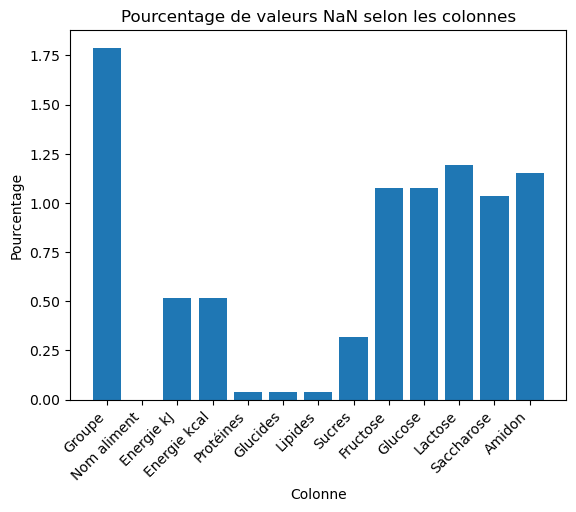

In [9]:
# Calcul des données manquantes selon les différentes colonnes

n = len(data_ciqual)
percentages = []
for col in (list(data_ciqual.columns)):
    percentages.append(((data_ciqual[col].isna()).sum()/n)*100)
plt.bar(data_ciqual.columns, percentages)
plt.xlabel('Colonne')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45, ha='right')
plt.title('Pourcentage de valeurs NaN selon les colonnes')
plt.show()

Les valeurs principales qui nous intéressent sont dans un premier temps le nom des aliments étant donné que l'on veut un matching avec les noms d'aliments présents dans les recettes sur Marmiton. Dans un second temps, si nous voulons traiter l'apport énergétique nous nous intéresserons également à ces données. 
Les résultats sont donc très satisfaisants car il n'y a aucun nom d'aliment manquant et les apports sont manquants à hauteur de seulement 1%.

## 2. Simplification des ingrédients et normalisation (NLP)

Afin de relier les ingrédients des recettes aux ingrédients de la base, nous devons nous assurer que les noms des ingrédients sont clairs et similaires à ceux des recettes. Nous vérifions donc qu'il n'existe pas de doublons ou d'ingrédients trop similaires dans la base Ciqual. Nous mettons ensuite en place des méthodes de distance pour comparer les ingrédients. 

La librairie **unidecode** sur Python permet de produire une représentation ASCII (American Standard Code for Information Interchange) d'un texte donné. Dans notre cas, elle va permettre de supprimer les accents sur les noms des aliments.

Afin d'identifier les mots superflus dans les noms d'aliments, on affiche un nuage de mots. 

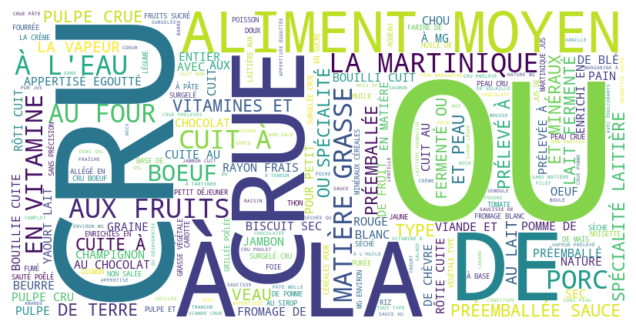

In [10]:
concat_aliments = ' '.join(data_ciqual["Nom aliment"].apply(lambda row : row.upper()))
cloud = WordCloud(width=800, height=400, background_color='white').generate(concat_aliments)
plt.figure(figsize=(8, 4))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

On réalise qu'il y a pour le moment beaucoup de bruit dans les noms d'aliments, tel que **cru** ou **aliment**. On définit donc une liste de stopwords (qui ne doit pas être trop grande néanmoins car on veut pouvoir apparier les aliments avec ceux des recettes).

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

def cleaning(s):
    stop_words_spe = ['CRU','CRUE','ALIMENT','TOUT','TYPE','PREEMBALLE','PREEMBALLEE','PREEMBALLEES','MOYEN','CUIT',
                      'CUITE','PETIT DEJEUNER','ROTI','ROTIE','FOUR','AU FOUR','KG','CL','G','L','MG','MARTINIQUE',
                      'VITAMINES','MINERAUX'
                     ]
    stop_words_default = [s.upper() for s in stopwords.words('french')]
    stop_words = set(stop_words_default + stop_words_spe)
    s = unidecode(s)
    s = s.upper()
    s = sub("[^A-Z ]", " ", s)
    mots = word_tokenize(s)
    mots_filtres = [mot for mot in mots if mot not in stop_words]
    #from nltk.stem.snowball import FrenchStemmer
    #s = " ".join(FrenchStemmer().stem(s) for s in s.split())
    return ' '.join(mots_filtres)
    

# Apply the function to the column of ingredients' names 
data_ciqual["Nom clean"] = data_ciqual["Nom aliment"].apply(cleaning)
#data_ciqual

[nltk_data] Downloading package stopwords to /Users/lila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lila/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


On affiche le nouveau nuage de mots, plus clair cette fois ! 

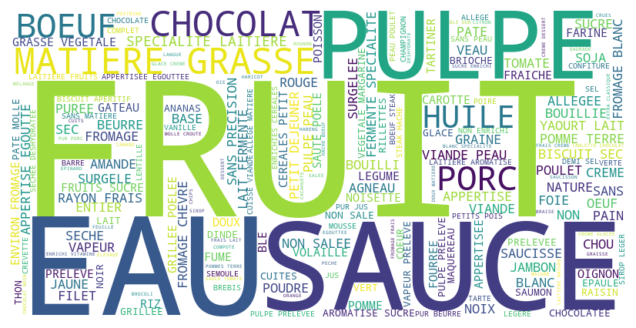

In [15]:
concat_aliments = ' '.join(data_ciqual["Nom clean"])
cloud = WordCloud(width=800, height=400, background_color='white').generate(concat_aliments)
plt.figure(figsize=(8, 4))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Distance entre les aliments de Ciqual et la recette

En première approche, nous décidons d'utiliser la **distance de Levenshtein** à l'aide du package rapidfuzz de python. 

In [224]:
rapidfuzz.distance.Levenshtein.distance('sucre blanc','sucre roux', weights =(1,1,1))

5

## Matching avec les ingrédients de la recette 

On crée ensuite une fonction qui associe à chaque ingrédient de la recette, les ingrédients présents dans la base de données et leur apport calorique.

In [63]:
from itertools import product
from difflib import SequenceMatcher
from jellyfish import jaro_winkler_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

distances ={}

# Levenshtein distance 

distances["lev"] = lambda s1,s2 : rapidfuzz.distance.Levenshtein.normalized_distance(s1, s2,weights =(1,1,1))

# Similarity ratio  
distances["sqcmatcher"] = lambda s1, s2: 1 - SequenceMatcher(None, s1, s2).ratio()

# Jaro-Winkler similarity

distances["jaro_winkler"] = lambda s1, s2 : jaro_winkler_similarity(s1,s2)

# Cosine similarity 
distances["cosine"] = lambda s1,s2 : cosine_similarity([CountVectorizer().fit_transform[s1,s2].toarray()[0]],
                                                      [CountVectorizer().fit_transform[s1,s2].toarray()[1]])[0][0]

# Jaccard similarity 

#distances["jaccard"] = lambda s1,s2 : len(set(s1).intersection(set(s2)))/len(set(s1).union(set(s2)))

def dist(a,b):

    if a == b:
        return 0.0

    la, lb = len(a), len(b)
    if len(a) > len(b):
        la, lb, a, b = lb, la, b, a

    if (
        ("beurr" in a) and not ("cacao" in a) and ("beurr de cacao" in b)
    ):  # frequent pathologic case
        return 1.0

    if b.startswith(a):
        return 0.2 - 0.2 * la / lb
    a_split = a.split()
    if b.startswith(a_split[0]):
        common_start = a_split[0]
        i = 1
        while i < len(a_split) and b.startswith(common_start):
            common_start += a_split[i]
            i += 1
        return 0.4 - 0.2 * len(common_start) / la
    elif a in b:
        return 0.6 - 0.2 * b.find(a) / lb
    elif a_split[0] in b:
        return 0.6 + 0.2 * rapidfuzz.distance.Levenshtein.normalized_distance(a, b,weights =(1,1,1))
    else:
        return 0.8 + 0.2 * rapidfuzz.distance.Levenshtein.normalized_distance(a, b,weights =(1,1,1))

distances["test"] = dist




In [86]:
def calcul_match(ingr_recette,ingr_ciqual,metrique):

    """ 
    returns the ingrédients in the Ciqual database that best match the ingredients 
    of the recipe we try to reproduce 
    
    """
    # On nettoie les ingrédients de la recette passés en entrée 

    #ingr_clean = pd.DataFrame([cleaning(ingr) for ingr in ingr_recette])
    ingr_clean = cleaning(ingr_recette)
    # Produit cartésien entre la recette et les produits Ciqual et obtention des distances 
 
    #ingr_ciqual["dist"] = ingr_ciqual["Nom clean"].apply(lambda prod : rapidfuzz.distance.Levenshtein.normalized_distance(prod,ingr_clean,weights =(1,1,1)))

    ingr_ciqual["dist"] = ingr_ciqual["Nom clean"].apply(lambda prod : metrique(prod,ingr_clean))
    #produits_combines = list(product(ingr_recette, produits_ciqual))

    
    return ingr_ciqual.sort_values("dist").head(1)


test = ["sel123","poivre","carotte jaune haché","purée de tomate (passata)"]

calcul_match("carotte",data_ciqual,dist)["Nom clean"]

468    CAROTTE
Name: Nom clean, dtype: object

In [87]:
def compare(mots,prods,distances):
    mots_clean = [cleaning(m) for m in mots]
    data_comp = pd.DataFrame({"Nom alim":mots_clean})
    for m in mots_clean:
        for nom_dist,f_dist in distances.items():
            print(f'{nom_dist}:{f_dist}')
            prods["dist"] = prods["Nom clean"].apply(lambda p : f_dist(p,m))
            data_comp[nom_dist] = float(prods.sort_values("dist").head(1)["dist"])
            data_comp["Match"] = str(prods.sort_values("dist").head(1)["Nom clean"])
            print(data_comp)
    return mesures 

compare(["sel123","poivre","carotte jaune haché","purée de tomate (passata)"],data_ciqual,distances)

lev:<function <lambda> at 0x153db1260>
               Nom alim  lev                                         Match
0                   SEL  0.5  2528    MIEL\nName: Nom clean, dtype: object
1                POIVRE  0.5  2528    MIEL\nName: Nom clean, dtype: object
2   CAROTTE JAUNE HACHE  0.5  2528    MIEL\nName: Nom clean, dtype: object
3  PUREE TOMATE PASSATA  0.5  2528    MIEL\nName: Nom clean, dtype: object
sqcmatcher:<function <lambda> at 0x153db0220>
               Nom alim  lev                                           Match  \
0                   SEL  0.5  389    OSEILLE\nName: Nom clean, dtype: object   
1                POIVRE  0.5  389    OSEILLE\nName: Nom clean, dtype: object   
2   CAROTTE JAUNE HACHE  0.5  389    OSEILLE\nName: Nom clean, dtype: object   
3  PUREE TOMATE PASSATA  0.5  389    OSEILLE\nName: Nom clean, dtype: object   

   sqcmatcher  
0         0.4  
1         0.4  
2         0.4  
3         0.4  
jaro_winkler:<function <lambda> at 0x153db1120>
           

/var/folders/p2/mz39_3ld1931_8d18wv6l6jh0000gn/T/ipykernel_5641/3600825537.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_comp[nom_dist] = float(prods.sort_values("dist").head(1)["dist"])
/var/folders/p2/mz39_3ld1931_8d18wv6l6jh0000gn/T/ipykernel_5641/3600825537.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_comp[nom_dist] = float(prods.sort_values("dist").head(1)["dist"])
/var/folders/p2/mz39_3ld1931_8d18wv6l6jh0000gn/T/ipykernel_5641/3600825537.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_comp[nom_dist] = float(prods.sort_values("dist").head(1)["dist"])


TypeError: 'method' object is not subscriptable

# **WEBSCRAPING DE MARMITON**

# **1. Installation de Selenium**
Pour mimer le comportement d'un utilisateur qui navigue sur une page web (et pas sur une page statique), on utilise Selenium.
Cela nécessite l'installation de quelques dépendances avant l'installation de Selenium lui-même.

## 1.1. On installe les dépendances

In [79]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

import chromedriver_autoinstaller
chromedriver_autoinstaller.install()

--2023-12-27 18:12:45--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 64.233.167.93, 64.233.167.190, 64.233.167.91, ...
Connecting to dl.google.com (dl.google.com)|64.233.167.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104953176 (100M) [application/x-debian-package]
Saving to: ‘/tmp/chrome.deb’

/tmp/chrome.deb     100%[===================>] 100.09M  68.9MB/s    in 1.5s    

2023-12-27 18:12:47 (68.9 MB/s) - ‘/tmp/chrome.deb’ saved [104953176/104953176]

Hit:1 https://dl.google.com/linux/chrome/deb stable InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease  
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease    
Hit:6 https://apt.postgresql.org/pub/repos/apt jammy-pgdg InRelease
Fetched 229 kB in 2s (125 kB/s)   

'/opt/mamba/lib/python3.10/site-packages/chromedriver_autoinstaller/120/chromedriver'

## 1.2. On installe Selenium

In [3]:
!pip install webdriver-manager

import selenium
from webdriver_manager.chrome import ChromeDriverManager

path_to_web_driver = ChromeDriverManager().install()

# **2. Lancement de marmiton**

## 2.1. On initialise le navigateur
Pour mimer le comportement d'un utilisateur, on doit initialiser le navigateur, notammment pour pouvoir mimer un temps de latence (un utilisateur n'agit pas de manière absolument instantanée) et le fait d'actionner les touches du clavier.

In [70]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

## 2.2. On lance le navigateur
On exécute le navigateur comme le ferait un utilisateur.

In [5]:
from selenium.webdriver.chrome.service import Service
service = Service(executable_path=path_to_web_driver)

browser = webdriver.Chrome(service=service,
                           options=chrome_options)

## 2.3. On se rend sur marmiton
La commande "get" nous permet de réaliser cette action très facilement. 

In [31]:
browser.get('https://www.marmiton.org')
print('Arrivée sur marmiton')

Arrivée sur marmiton


# **3. Gestion des cookies**
Lorsqu'on arrive sur le site de Marmiton, un popup s'ouvre qui demande à ce que l'on accepte les cookies.\
Pour que cette acceptation se fasse automatiquement, on recherche dans le code source le bouton "accepter les cookies" et on mime le comportement d'un utilisateur qui actionnerait cette commande.

In [71]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, WebDriverException

try : 
    popup = browser.find_element(By.ID, "didomi-notice-agree-button")
    popup.click()
    time.sleep(2)
except NoSuchElementException:
    pass

print("Entrée sur marmiton réussie \n")

Entrée sur marmiton réussie 



# **4. Recherche de recettes pour un ingrédient donné**

## 4.1. On recherche l'ingrédient choisi dans la barre de recherche du site
a) On se place dans la barre de recherche\
b) On mime le comportement d'un utilisateur qui utiliserait le clavier pour formuler sa requête (en terminant par actionner la touche "ENTREE"/"RETURN")

In [78]:
search = browser.find_element("name", "aqt")
print(search)

search.send_keys("farine")
search.send_keys(Keys.RETURN)

time.sleep(1)

print("recettes trouvées")

<selenium.webdriver.remote.webelement.WebElement (session="09aa4b2080f78835e845fa81d45590b4", element="34FF6F60376438B5D5410BD25D8301C1_element_4452")>
recettes trouvées


## 4.2. On résupère l'URL de la page présentant les résultats de la recherche
Cela se fait très facilement à partir du code suivant.

In [10]:
url = browser.current_url
print(url)

https://www.marmiton.org/recettes/recherche.aspx?aqt=farine


## 4.3. On récupère les url des pages correspondant aux différentes recettes trouvées

### 4.3.1 Grâce au xpahth, on récupère les url des recettes trouvées
a) On importe le package urllib3\
b) On installe la bibliothèque lxml qui est une bibliothèque de traitement prenant notamment en charge xpath\
c) On récupère le xpath de la page de résultats obtenue après la recherche précédente\
d) Cela nous permet, pour chacun des noeuds dépendant de ce xpath, de récupérer l'url correspondante\
e) On affiche les url des noeuds qui nous intéressent, c'est-à-dire de ceux menant à des recettes (et dont l'url commence donc par "/recettes/recette").

In [17]:
import urllib3
http = urllib3.PoolManager()
r= http.request('GET', url)
# si on veut : print(r.data)

!pip install lxml 
from lxml import html

data_string = r.data.decode('utf-8', errors = 'ignore')
tree = html.fromstring(data_string)

links = tree.xpath('//a')
for link in links:
    l = link.get('href')
    if l.startswith('/recettes/recette'):
        print(l)

/recettes/recettes-incontournables.aspx
/recettes/recette_gateau-moelleux-a-la-farine-de-chataigne_85864.aspx
/recettes/recette_tortillas-recette-sans-farine-de-mais_40389.aspx
/recettes/recette_gateau-au-chocolat-sans-farine-et-sans-beurre_17669.aspx
/recettes/recette_cake-a-la-farine-de-chataigne_13766.aspx
/recettes/recette_moelleux-au-chocolat-sans-gluten-farine-de-riz_42417.aspx
/recettes/recette_besan-paratha-beignets-a-la-farine-de-pois-chiches-inde_15796.aspx
/recettes/recette_gateau-de-farine-de-chataigne-noisettes-et-chocolat_17184.aspx
/recettes/recette_cake-farine-complete-jambon-gruyere_37981.aspx
/recettes/recette_gateau-aux-pommes-a-la-farine-de-chataigne_54688.aspx
/recettes/recette_gateau-au-chocolat-fondant-sans-farine_30347.aspx
/recettes/recette_gateau-au-yaourt-aux-3-farines_42407.aspx
/recettes/recette_gateau-a-l-orange-et-poudre-d-amande-sans-farine_371165.aspx


### 4.3.2. On crée une liste avec les url correspondant aux recettes trouvées
Pour cela, on commence par créer une liste vide. Pour chaque noeud du xpath trouvé précédemment, on obtient l'url grâce à la méthode "get('href')". On ne conserve que les noeuds menant à des recettes, c'est-à-dire ceux dont l'url commence par "/recettes/recette". Enfin, pour que le navigateur puisse suivre ces url par la suite, il faut ajouter "https://www.marmiton.org".\
On obtient alors une liste d'url pertinentes et fonctionnelles. 

In [67]:
liste_url_recettes = []
for link in links:
    l = link.get('href')
    if l.startswith('/recettes/recette'):
        url_recette = 'https://www.marmiton.org'+l
        liste_url_recettes.append(url_recette)
print(liste_url_recettes)

['https://www.marmiton.org/recettes/recettes-incontournables.aspx', 'https://www.marmiton.org/recettes/recette_gateau-moelleux-a-la-farine-de-chataigne_85864.aspx', 'https://www.marmiton.org/recettes/recette_tortillas-recette-sans-farine-de-mais_40389.aspx', 'https://www.marmiton.org/recettes/recette_gateau-au-chocolat-sans-farine-et-sans-beurre_17669.aspx', 'https://www.marmiton.org/recettes/recette_cake-a-la-farine-de-chataigne_13766.aspx', 'https://www.marmiton.org/recettes/recette_moelleux-au-chocolat-sans-gluten-farine-de-riz_42417.aspx', 'https://www.marmiton.org/recettes/recette_besan-paratha-beignets-a-la-farine-de-pois-chiches-inde_15796.aspx', 'https://www.marmiton.org/recettes/recette_gateau-de-farine-de-chataigne-noisettes-et-chocolat_17184.aspx', 'https://www.marmiton.org/recettes/recette_cake-farine-complete-jambon-gruyere_37981.aspx', 'https://www.marmiton.org/recettes/recette_gateau-aux-pommes-a-la-farine-de-chataigne_54688.aspx', 'https://www.marmiton.org/recettes/rece

## 4.4. Visualisation
Cette liste d'url nous permet de retrouver les différentes recettes en suivant le lien et également de trouver leurs noms, qui sont à chaque fois contenus dans l'url.

### 4.4.1 Pour chaque recette, on peut suivre l'url

In [68]:
import requests

for recette in liste_url_recettes:
    print(requests.get(recette))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


### 4.4.2. On peut afficher les titres des différentes recettes
En effet les url des recettes sont constuits selon un format semblable, ce qui fait que le nom de la recette est toujours un segment de l'url situé à la même position. Il suffit donc de ne choisir que certains caractères de l'url.

In [74]:
for recette in liste_url_recettes:
    print(recette[42:-11])

-incontour
gateau-moelleux-a-la-farine-de-chataigne
tortillas-recette-sans-farine-de-mais
gateau-au-chocolat-sans-farine-et-sans-beurre
cake-a-la-farine-de-chataigne
moelleux-au-chocolat-sans-gluten-farine-de-riz
besan-paratha-beignets-a-la-farine-de-pois-chiches-inde
gateau-de-farine-de-chataigne-noisettes-et-chocolat
cake-farine-complete-jambon-gruyere
gateau-aux-pommes-a-la-farine-de-chataigne
gateau-au-chocolat-fondant-sans-farine
gateau-au-yaourt-aux-3-farines
gateau-a-l-orange-et-poudre-d-amande-sans-farine_


## 4.5. On crée une liste de recettes
Chaque recette est un dictionnaire comportant le nom de la recette, la liste des ingrédients et l'url associé.\
a) On commence par créer une liste vide\
b) Pour chaque recette (à partir de l'url trouvé plus haut), on définit le nom de la recette\
c) Pour chaque recette, grâce à une recherche dans le code source, on trouve la liste des ingrédients\
d) Pour chaque recette, on crée un dictionnaire avec le nom de la recette, la liste des ingrédients et l'url renvoyant à la page marmiton correspondante\
e) Enfin, on enlève la première "recette", qui correspond, non pas à une véritable recette mais à une page de "recettes incontournables" qui ne nous intéressent pas ici

In [77]:
liste_recettes = []

for url_recette in liste_url_recettes:
    
    titre = url_recette[42:-11]
    
    browser.get(url_recette)
    liste_url_ingredients = browser.find_elements(By.CLASS_NAME, 'card-ingredient')
    liste_ingredients = []
    for x in liste_url_ingredients:
        liste_ingredients.append(x.text)

    recette = {'Recette':titre, 'Liste des ingrédients':liste_ingredients, 'Lien vers la recette':url_recette}
    
    liste_recettes.append(recette)
    
print(liste_recettes[1:])

[{'Recette': 'gateau-moelleux-a-la-farine-de-chataigne', 'Liste des ingrédients': ['1 pincée\nde sel', "1 bonne cuillère à café\nd' extrait de vanille liquide", '1 sachet\nde levure chimique', "10 cl\nd' huile", '180 g\nde sucre blanc ou sucre de canne', '160 g\nde farine de châtaigne', '10 cl\nde lait', '4\noeufs', "5 cl\nd' eau de vie ou de rhum"], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_gateau-moelleux-a-la-farine-de-chataigne_85864.aspx'}, {'Recette': 'tortillas-recette-sans-farine-de-mais', 'Liste des ingrédients': ['1 cuillère à café rase\nde sel', "5 cl\nd' huile de tournesol", '250 g\nde farine de blé (+ 1 ou 2 cuillère pour le plan de travail)', "13 cl\nd' eau tiède salée"], 'Lien vers la recette': 'https://www.marmiton.org/recettes/recette_tortillas-recette-sans-farine-de-mais_40389.aspx'}, {'Recette': 'gateau-au-chocolat-sans-farine-et-sans-beurre', 'Liste des ingrédients': ['100 g\nde sucre', '2 tablettes\nde chocolat à croquer', '4\noeufs', "100 

# **5. Fin du webscrapping : on quitte la recherche**
Le webscrapping est terminé, on peut donc quitter le navigateur.

In [ ]:
browser.quit()